In [1]:
### Imports
import os
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Constants
DATA_PATH = "./raw/"

# Data Understanding

In [2]:
# Load dataset
files = []
for file in os.listdir(DATA_PATH):
    if file.endswith(".csv"):
        files.append(file)

dfs = []
for file in files:
    d = pd.read_csv(DATA_PATH + file)
    d["region"] = file[0:2]
    dfs.append(d)

df = pd.concat(dfs, axis = 0)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA


In [25]:
# Number of records and features
df.shape

(239662, 17)

In [26]:
# Basic statistics for numerical columns
df.describe()

,category_id,views,likes,dislikes,comment_count
count,239662.000000,2.396620e+05,2.396620e+05,2.396620e+05,2.396620e+05
mean,20.002950,1.898465e+06,5.218776e+04,2.849046e+03,5.632043e+03
std,7.271423,8.746280e+06,1.950500e+05,2.703692e+04,2.951592e+04
min,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,8.385125e+04,1.277000e+03,7.300000e+01,1.760000e+02
50%,24.000000,3.082685e+05,6.522000e+03,2.960000e+02,7.910000e+02
75%,24.000000,1.041631e+06,2.895575e+04,1.126000e+03,3.043000e+03
max,44.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


In [27]:
# Metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239662 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                239662 non-null  object
 1   trending_date           239662 non-null  object
 2   title                   239662 non-null  object
 3   channel_title           239662 non-null  object
 4   category_id             239662 non-null  int64 
 5   publish_time            239662 non-null  object
 6   tags                    239662 non-null  object
 7   views                   239662 non-null  int64 
 8   likes                   239662 non-null  int64 
 9   dislikes                239662 non-null  int64 
 10  comment_count           239662 non-null  int64 
 11  thumbnail_link          239662 non-null  object
 12  comments_disabled       239662 non-null  bool  
 13  ratings_disabled        239662 non-null  bool  
 14  video_error_or_removed  239662 non-nu

In [28]:
# Null / Missing Values
df.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               7503
region                       0
dtype: int64

<AxesSubplot:>

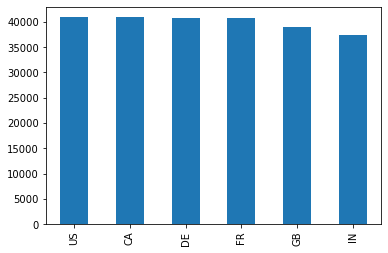

In [7]:
# Region based data count
df["region"].value_counts().plot(kind = 'bar')